# This "Iris" dataset contains 150 observations of iris flowers. There are four coloumns of measurements of the flowers in centemeters. The fifth coloumn is the species of flower observed. All observed flowers belong to one of the three species.

In [0]:
#import pandas & matplot library 
import io
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [0]:
#import datasets

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

<h1>**Dimensioms of Dataset**</h1>

Lets have a look into how many instances (rows) and how many attributes (coloumns) the data contains with the shape property 

In [132]:
dataset.shape

(150, 5)

**Looking into data**

In [133]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


<h1>**Summary of the data**</h1>

In [134]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


<h1>**Class Distribution**</h1>



Let's see how many number of instances (rows) that belong to each class. 

In [135]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<h1>FInding Co-realtion between data</h1>

Everything in this universe has patterns. If we can visualize an object, we can easily figure out the corelation between tham . So let us try and find out co-relation between the data's we have 

In [136]:
corelation = dataset.corr()
corelation

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


The satandard corelation coefficient usually varies between -1 to 1 , which generally means one thing is depended on another . So, when one increases in some sides , another will decrease and vice versa. Here , we can see sepal length is somewhat related to petal-length . lets have a more closer look to find whats going on here -

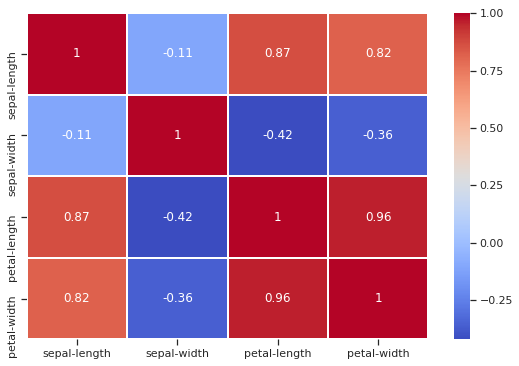

In [137]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corelation, cmap='coolwarm', annot=True, linewidths=1, ax=ax)

lets plot two features sepal_leangth  vs "petal_length" to find the best possible "best fit line"

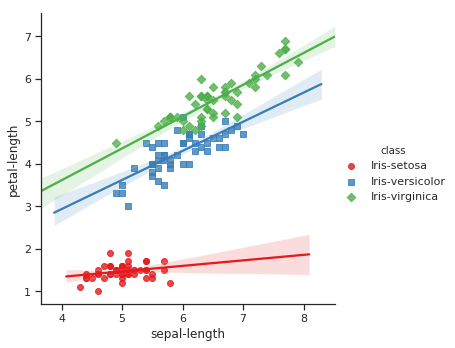

In [138]:
# sns.lmplot(x="petal-length", y= "sepal-length", data =dataset, palette="Set1", markers=["o", "s", "D"])

sns.set(style="ticks", color_codes=True) #change style
sns.lmplot( x="sepal-length", y="petal-length", hue="class", data = dataset,
              palette="Set1", markers=["o", "s", "D"])

Lets find more about our data and their relatioship by using pairplot 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


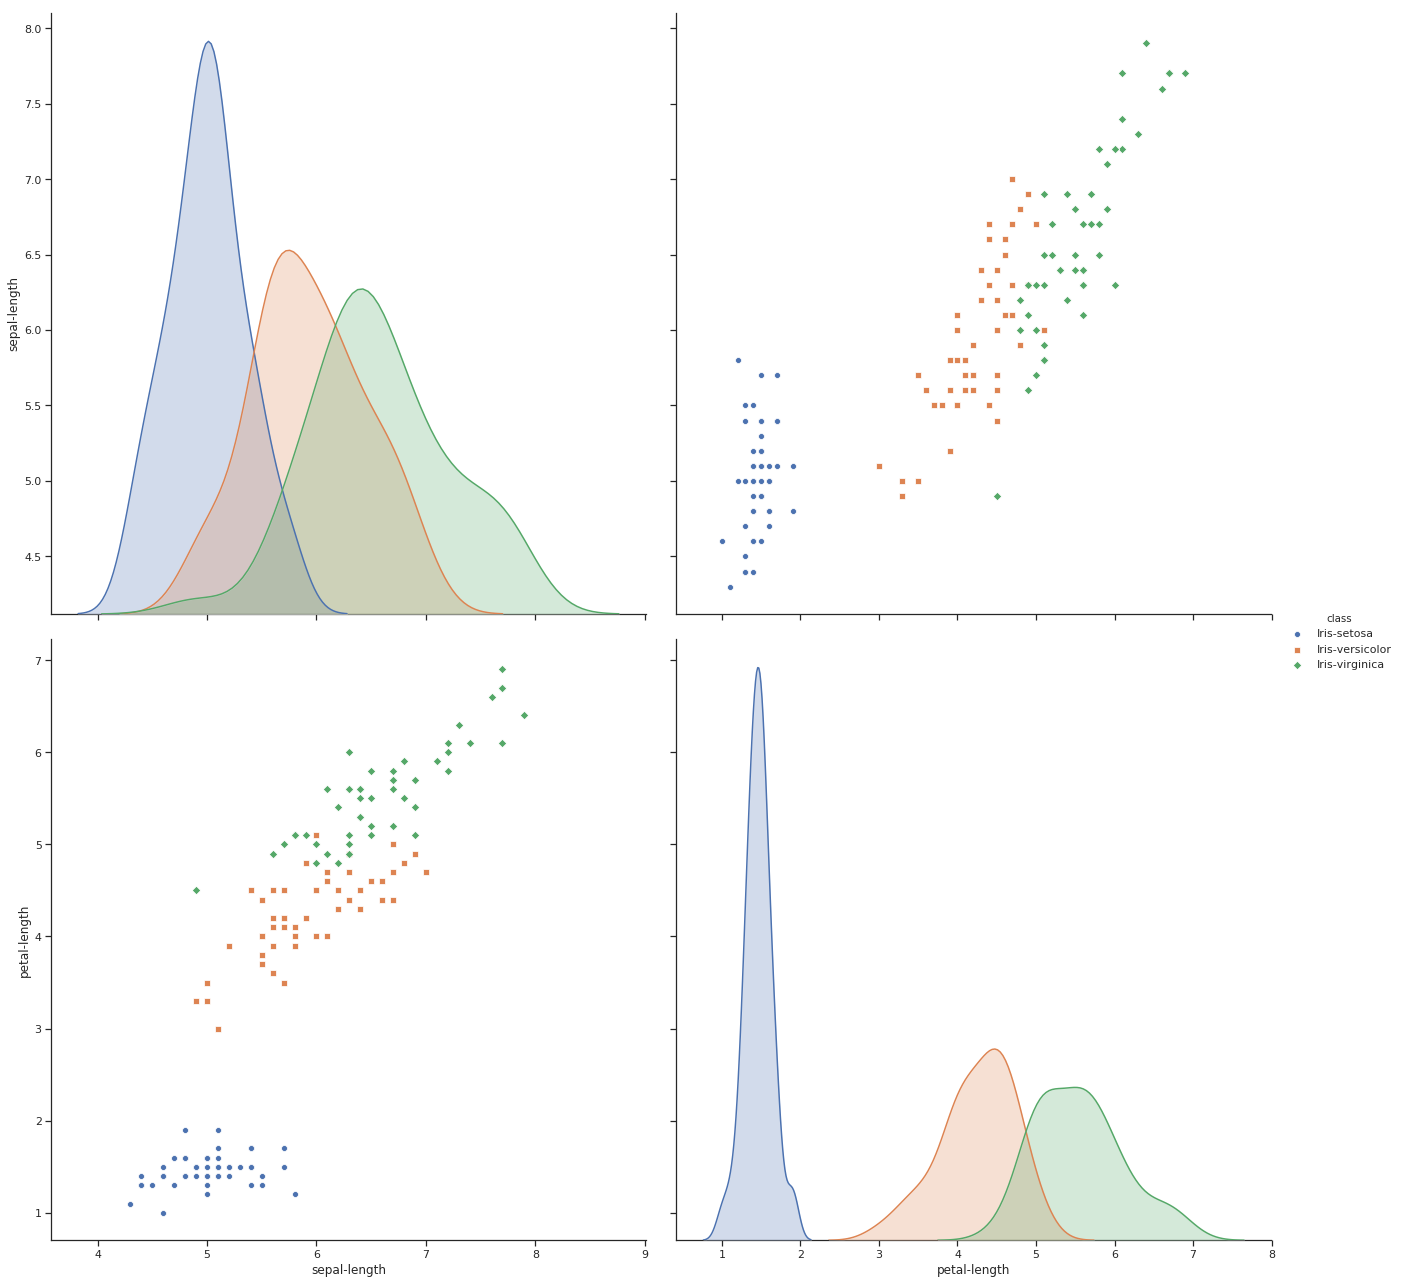

In [139]:
sns.pairplot(dataset, size =9, vars=["sepal-length","petal-length"], markers=["o", "s", "D"], hue ="class")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


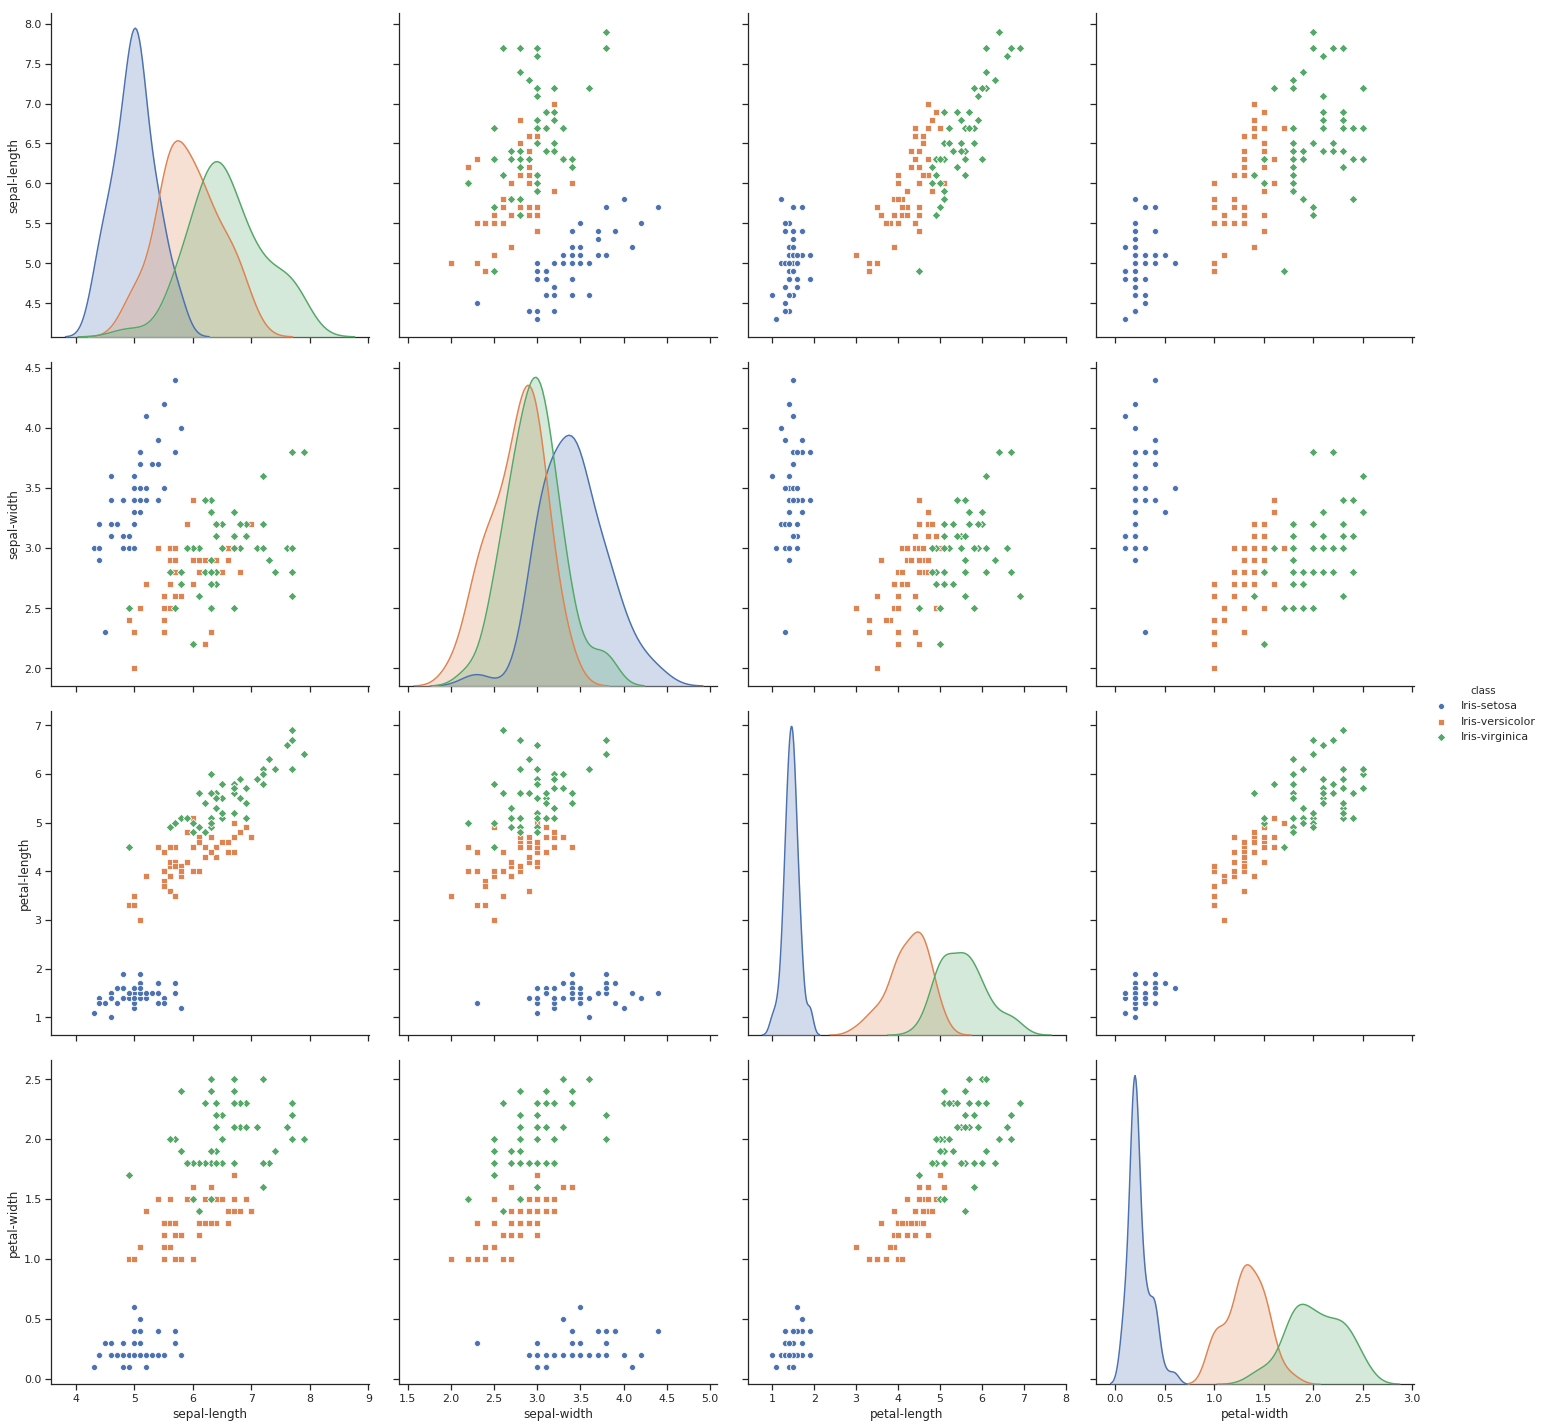

In [140]:
sns.pairplot(dataset, size=5, markers=["o", "s", "D"], hue="class")

<h1>Create a validation Dataset</h1>

Here, I am spliting the dataset into two, where 80% of the data will be used to train our model and rest of them will be used for validation .

In [0]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Now that , Our data has been prepared and splited into desired form we can move on to Model creation 

<h1>Test Harness</h1>

I am going to use 10-fold cross validation here to estimate my model accuracy, which will split my dataset into 10 parts, train on 9 and test on 1.

In [0]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

<h1>Building Models</h1>

I am going to test 3 different algorithms here. namely- 


1.   Logistic regression 
2.   K-nearest neighbour
3.Support Vector Machines



Lets Find the best algorithms between this  three

In [143]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
KNN: 0.983333 (0.033333)
SVM: 0.991667 (0.025000)


Here we can see, SVM has the best accuracy score 

<h1>Making Predictions</h1>

In [144]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



Here the accuracy score is 0.9 or 90%

In [151]:
clf = svm.SVC(gamma='scale')
clf.fit(X_train, Y_train)
predictions = clf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [153]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = clf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Both SVM and LogisticRegression scored same accuracy result with 87% accuray. 